[[  0   0]
 [  0   0]
 [  0   0]
 ...
 [251  46]
 [254  56]
 [237  50]]
(3628271,)


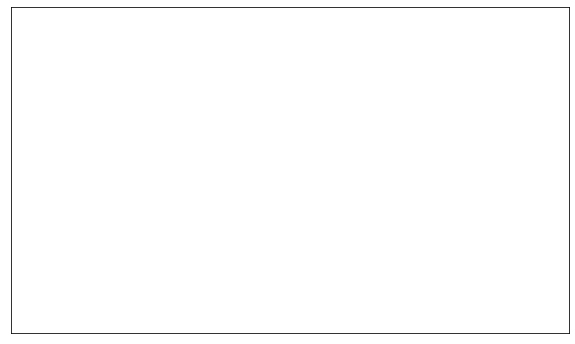

In [135]:
import numpy as np
import scipy
import cv2
from google.colab import files
from scipy.io import wavfile
import matplotlib
fs, data = wavfile.read("SilentKnight.wav")
data2=[None] * 822
fft_max=[None] * 822
fft_son=[None] * 822

import matplotlib.pyplot as plt
print(data)
data = data[:,1]
rate=44100/10
print(data.shape)
a=0
n = len(data)

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
out=cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc(*'XVID'),24.0,(1000,600))
for i in range(822):

  data2[i]=data[int(a):int(rate)]
  
  rate=rate+4410
  a=a+4410
  data2=np.asarray(data2)
 
  
  fft_max[i]=data2[i]/max(abs(data2[i]))
  fftson[i]=np.fft.fft(fft_max[i])
  data2[i]=np.fft.fftshift(fftson[i])
  fftson[i] = data2[i][0:int(np.ceil((n+1)/2.0))]
  ax.plot( 10*np.log10(fftson[i])+1)
  plt.savefig('snap{}.png'.format(i),format='png')
  ax.clear()
  X=cv2.imread('snap{}.png'.format(i))



In [151]:

imageslist = []


for i in range(822):
	image = cv2.imread("snap{}.png".format(i))  
	imageslist.append(image[:,:,::-1]) 


clip = mpe.ImageSequenceClip(imageslist, fps=10) 
audio_background = mpe.AudioFileClip("SilentKnight.wav")
final_clip = clip.set_audio(audio_background)
final_clip.write_videofile('son.mp4', codec='mpeg4',bitrate="12000k")



[MoviePy] >>>> Building video son.mp4
[MoviePy] Writing audio in sonTEMP_MPY_wvf_snd.mp3


100%|██████████| 1815/1815 [00:02<00:00, 734.99it/s]

[MoviePy] Done.
[MoviePy] Writing video son.mp4



100%|██████████| 822/822 [00:08<00:00, 95.90it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: son.mp4 



(1543556, 2)
(1543556,)
(270903850,)


(array([[2.54531874e+04, 8.99933150e+03, 1.38284925e+05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.10301934e+04, 3.93722900e+03, 1.18897240e+05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.14678245e+03, 1.76411113e+03, 7.28024748e+03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.21097618e-04, 1.39736670e-05, 1.19047235e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.98465597e-05, 4.73664318e-06, 1.00218251e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.21373961e-05, 4.95771602e-06, 2.28883792e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([    0.      ,   172.265625,   344.53125 ,   516.796875,
          689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
         1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
         2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
         

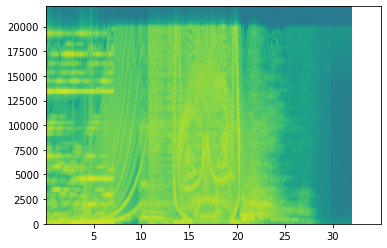

In [149]:
#Part2
#Spectrogram
fss, dataspec = wavfile.read("aphex_twin_equation.wav")
print (dataspec.shape)
dataspec2=[None] * 350
fft_maxspec=[None] * 350
fft_sonspec=[None] * 350
dataspec=np.asarray(dataspec)
dataspec = dataspec[:,1]
print(dataspec.shape)
list=[]
a=0
n = len(data)
for i in range(350):

  dataspec2[i]=dataspec[int(a):int(rate)]
  
  rate=rate+4410
  a=a+4410
  dataspec2=np.asarray(dataspec2)
 
  
  fft_maxspec[i]=dataspec2[i]/max(abs(dataspec2[i]))
  fft_sonspec[i]=np.fft.fft(fft_maxspec[i])
  
  fft_sonspec[i] = dataspec2[i][0:int(np.ceil((n+1)/2.0))]
  fft_sonspec[i].reshape(len(fft_sonspec[i]),1)
  list.append(fft_sonspec[i])
spectogram=np.concatenate(list,axis=-1)
spectogram=spectogram[::-1]
spectogram=np.asarray(spectogram)
print(spectogram.shape)
#plt.pcolormesh((fft_sonspec,fss))
plt.specgram(dataspec,Fs=fss)

